## import Libraries

In [431]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# import sidekicklearn as sklearn

In [432]:
from scipy.signal._signaltools import _centered
import scipy.signal.signaltools

def _centered(arr, newsize):
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind =  (currsize -  newsize) // 2
    endind =  startind + newsize
    myslice =  [slice(startind[k],endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered =  _centered

In [433]:
import statsmodels.api as sm

In [434]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr, tpr, color='orange', label ='ROC')
    plt.plot([0,1],[0,1], color = 'navy', lw=2, linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False positve rate')
    plt.ylabel('True positive rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# LOAD THE DATA

In [435]:
bankData=pd.read_csv('bank-full-Interview.csv')

In [436]:
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [437]:
len(bankData)

45211

# DATA EXPLORATION

In [438]:
## Data Structure
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [439]:
bankData_cat = bankData.select_dtypes(object)
bankData_num = bankData.select_dtypes(np.number)

In [440]:
bankData_cat.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [441]:
bankData_cat.describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [442]:
y_summary=pd.get_dummies(bankData['y'], dtype=int)
y_summary.sum()

no     39922
yes     5289
dtype: int64

In [443]:
job_summary=pd.get_dummies(bankData['job'], dtype=int)
job_summary.sum()

admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
dtype: int64

In [444]:
marital_summary=pd.get_dummies(bankData['marital'], dtype=int)
marital_summary.sum()

divorced     5207
married     27214
single      12790
dtype: int64

In [445]:
education_summary=pd.get_dummies(bankData['education'], dtype=int)
education_summary.sum()

primary       6851
secondary    23202
tertiary     13301
unknown       1857
dtype: int64

In [446]:
default_summary=pd.get_dummies(bankData['default'], dtype=int)
default_summary.sum()

no     44396
yes      815
dtype: int64

In [447]:
housing_summary=pd.get_dummies(bankData['housing'], dtype=int)
housing_summary.sum()

no     20081
yes    25130
dtype: int64

In [448]:
loan_summary=pd.get_dummies(bankData['loan'], dtype=int)
loan_summary.sum()

no     37967
yes     7244
dtype: int64

In [449]:
contact_summary=pd.get_dummies(bankData['contact'], dtype=int)
contact_summary.sum()

cellular     29285
telephone     2906
unknown      13020
dtype: int64

In [450]:
month_summary=pd.get_dummies(bankData['month'], dtype=int)
month_summary.sum()

apr     2932
aug     6247
dec      214
feb     2649
jan     1403
jul     6895
jun     5341
mar      477
may    13766
nov     3970
oct      738
sep      579
dtype: int64

In [451]:
poutcome_summary=pd.get_dummies(bankData['poutcome'], dtype=int)
poutcome_summary.sum()

failure     4901
other       1840
success     1511
unknown    36959
dtype: int64

<Axes: xlabel='count', ylabel='poutcome'>

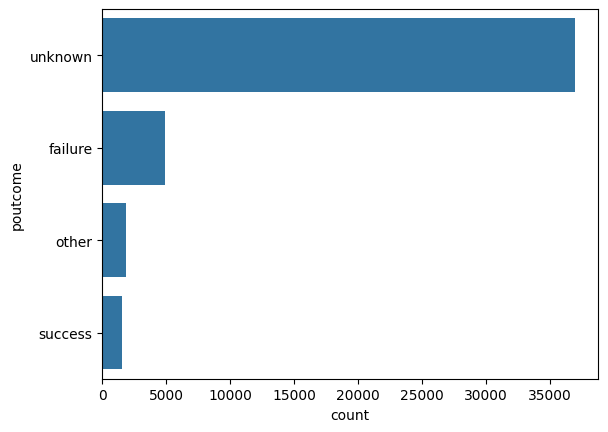

In [452]:
large_to_small_poutcome= bankData.groupby('poutcome').size().sort_values().index[::-1]
sns.countplot(data=bankData,y='poutcome', order=large_to_small_poutcome)

In [453]:
bankData_num.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [454]:
bankData_num.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## DATA CLEANING AND PREP

### Remove Variables that will not support this analysis
### "contact","month", "job" and "Education" Removed
  

In [455]:
bankData.drop(["contact","month","job","education"], axis=1, inplace=True)
bankData

,age,marital,default,balance,housing,loan,day,duration,campaign,pdays,previous,poutcome,y
0,58,married,no,2143,yes,no,5,261,1,-1,0,unknown,no
1,44,single,no,29,yes,no,5,151,1,-1,0,unknown,no
2,33,married,no,2,yes,yes,5,76,1,-1,0,unknown,no
3,47,married,no,1506,yes,no,5,92,1,-1,0,unknown,no
4,33,single,no,1,no,no,5,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,married,no,825,no,no,17,977,3,-1,0,unknown,yes
45207,71,divorced,no,1729,no,no,17,456,2,-1,0,unknown,yes
45208,72,married,no,5715,no,no,17,1127,5,184,3,success,yes
45209,57,married,no,668,no,no,17,508,4,-1,0,unknown,no


## Converting character columns to binary numbers
## housing / loan / marital / default / poutcome

In [456]:
bankData=pd.get_dummies(bankData, columns = ['y','housing','loan','marital','default','poutcome'],dtype='int')
bankData

,age,balance,day,duration,campaign,pdays,previous,y_no,y_yes,housing_no,...,loan_yes,marital_divorced,marital_married,marital_single,default_no,default_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
1,44,29,5,151,1,-1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
2,33,2,5,76,1,-1,0,1,0,0,...,1,0,1,0,1,0,0,0,0,1
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
4,33,1,5,198,1,-1,0,1,0,1,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,1,1,...,0,1,0,0,1,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,1,1,...,0,0,1,0,1,0,0,0,1,0
45209,57,668,17,508,4,-1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1


In [457]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               45211 non-null  int64
 1   balance           45211 non-null  int64
 2   day               45211 non-null  int64
 3   duration          45211 non-null  int64
 4   campaign          45211 non-null  int64
 5   pdays             45211 non-null  int64
 6   previous          45211 non-null  int64
 7   y_no              45211 non-null  int64
 8   y_yes             45211 non-null  int64
 9   housing_no        45211 non-null  int64
 10  housing_yes       45211 non-null  int64
 11  loan_no           45211 non-null  int64
 12  loan_yes          45211 non-null  int64
 13  marital_divorced  45211 non-null  int64
 14  marital_married   45211 non-null  int64
 15  marital_single    45211 non-null  int64
 16  default_no        45211 non-null  int64
 17  default_yes       45211 non-nul

# Check Correlation between Variables

In [458]:
bankData_4Analysis=bankData.drop(['y_no','housing_no','marital_divorced','marital_single','default_no','poutcome_failure','poutcome_other','poutcome_unknown','loan_no'],axis=1)
bankData_4Analysis

,age,balance,day,duration,campaign,pdays,previous,y_yes,housing_yes,loan_yes,marital_married,default_yes,poutcome_success
0,58,2143,5,261,1,-1,0,0,1,0,1,0,0
1,44,29,5,151,1,-1,0,0,1,0,0,0,0
2,33,2,5,76,1,-1,0,0,1,1,1,0,0
3,47,1506,5,92,1,-1,0,0,1,0,1,0,0
4,33,1,5,198,1,-1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1,0,0,1,0,0
45207,71,1729,17,456,2,-1,0,1,0,0,0,0,0
45208,72,5715,17,1127,5,184,3,1,0,0,1,0,1
45209,57,668,17,508,4,-1,0,0,0,0,1,0,0


# Split the data into 2 groups, each group will have y variable

In [459]:
bankData_4Analysis_1 = bankData_4Analysis[['y_yes','marital_married','housing_yes','loan_yes','default_yes','poutcome_success']]
bankData_4Analysis_1

,y_yes,marital_married,housing_yes,loan_yes,default_yes,poutcome_success
0,0,1,1,0,0,0
1,0,0,1,0,0,0
2,0,1,1,1,0,0
3,0,1,1,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
45206,1,1,0,0,0,0
45207,1,0,0,0,0,0
45208,1,1,0,0,0,1
45209,0,1,0,0,0,0


In [460]:
bankData_4Analysis_2 = bankData_4Analysis[['y_yes','age','day','balance','duration','campaign','pdays','previous']]
bankData_4Analysis_2

,y_yes,age,day,balance,duration,campaign,pdays,previous
0,0,58,5,2143,261,1,-1,0
1,0,44,5,29,151,1,-1,0
2,0,33,5,2,76,1,-1,0
3,0,47,5,1506,92,1,-1,0
4,0,33,5,1,198,1,-1,0
...,...,...,...,...,...,...,...,...
45206,1,51,17,825,977,3,-1,0
45207,1,71,17,1729,456,2,-1,0
45208,1,72,17,5715,1127,5,184,3
45209,0,57,17,668,508,4,-1,0


# Correlation-Group-1

In [461]:
correlation_1=bankData_4Analysis_1.corr().round(2)
correlation_1

,y_yes,marital_married,housing_yes,loan_yes,default_yes,poutcome_success
y_yes,1.00,-0.06,-0.14,-0.07,-0.02,0.31
marital_married,-0.06,1.00,0.02,0.04,-0.01,-0.02
housing_yes,-0.14,0.02,1.00,0.04,-0.01,-0.09
loan_yes,-0.07,0.04,0.04,1.00,0.08,-0.05
default_yes,-0.02,-0.01,-0.01,0.08,1.00,-0.02
poutcome_success,0.31,-0.02,-0.09,-0.05,-0.02,1.00


<Axes: >

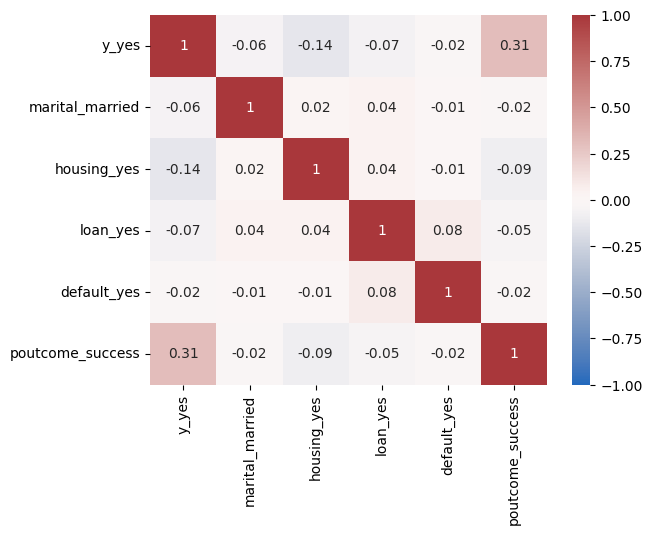

In [462]:
sns.heatmap(correlation_1,annot=True,vmin=-1,vmax=1, center=0, cmap='vlag')
# correlation_1 = correlation_1.unstack()
# correlation_1[(correlation_1)>0]

# Correlation-Group-2

In [463]:
correlation_2=bankData_4Analysis_2.corr().round(2)
correlation_2

,y_yes,age,day,balance,duration,campaign,pdays,previous
y_yes,1.00,0.03,-0.03,0.05,0.39,-0.07,0.10,0.09
age,0.03,1.00,-0.01,0.10,-0.00,0.00,-0.02,0.00
day,-0.03,-0.01,1.00,0.00,-0.03,0.16,-0.09,-0.05
balance,0.05,0.10,0.00,1.00,0.02,-0.01,0.00,0.02
duration,0.39,-0.00,-0.03,0.02,1.00,-0.08,-0.00,0.00
campaign,-0.07,0.00,0.16,-0.01,-0.08,1.00,-0.09,-0.03
pdays,0.10,-0.02,-0.09,0.00,-0.00,-0.09,1.00,0.45
previous,0.09,0.00,-0.05,0.02,0.00,-0.03,0.45,1.00


<Axes: >

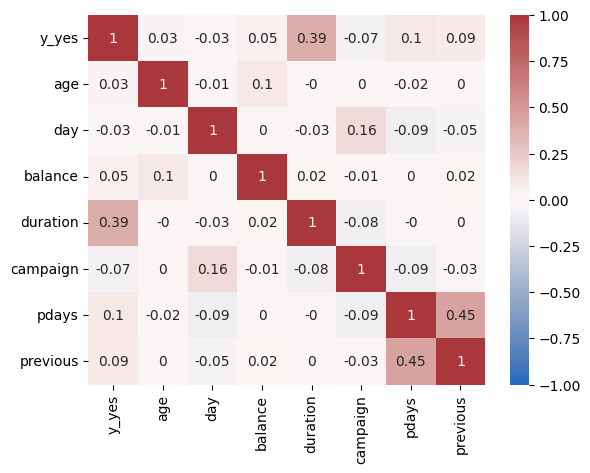

In [464]:
sns.heatmap(correlation_2,annot=True,vmin=-1,vmax=1, center=0, cmap='vlag')
# correlation_1 = correlation_1.unstack()
# correlation_1[(correlation_1)>0]

## Divide into Target Variable and Predictors

In [527]:
y=bankData["y_yes"] # our target variable
# 'balance', #  optional
X =bankData[["previous", "duration"]] # 'previous',

In [528]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y_yes, Length: 45211, dtype: int64

In [529]:
X

,previous,duration
0,0,261
1,0,151
2,0,76
3,0,92
4,0,198
...,...,...
45206,0,977
45207,0,456
45208,3,1127
45209,0,508


## Normalize our predictors

In [530]:
from sklearn.preprocessing import StandardScaler
# create a scaler object
scaler = StandardScaler()

# fit the scaler to the data and transform the data
X_scaled =  scaler.fit_transform(X)
X_scaled

array([[-0.25194037,  0.0110161 ],
       [-0.25194037, -0.41612696],
       [-0.25194037, -0.70736086],
       ...,
       [ 1.05047333,  3.37379688],
       [-0.25194037,  0.97014641],
       [ 4.52357654,  0.39932797]])

## Split the data for Train and Test

In [532]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

## Train the model

In [533]:
from sklearn.linear_model import LogisticRegression

#create the lr model
lr = LogisticRegression()

# train the model on the training data
lr.fit(X_train, y_train)

# predict the target variable on test data
y_pred = lr.predict(X_test)

In [498]:
y_pred 

array([0, 0, 0, ..., 0, 0, 0])

In [499]:
y_test

3776     0
9928     0
33409    0
31885    0
15738    0
        ..
9016     0
380      0
7713     0
12188    0
28550    0
Name: y_yes, Length: 13564, dtype: int64

## Evaluation of the model

In [550]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy: .2f}")

Accuracy:  0.89


In [551]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11966
           1       0.56      0.16      0.25      1598

    accuracy                           0.89     13564
   macro avg       0.73      0.57      0.60     13564
weighted avg       0.86      0.89      0.86     13564



In [546]:
logit_model = sm.Logit(y,X_scaled).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.652579
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  y_yes   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45209
Method:                           MLE   Df Model:                            1
Date:                Sun, 25 Aug 2024   Pseudo R-squ.:                 -0.8083
Time:                        19:05:21   Log-Likelihood:                -29504.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1966      0.014     14.446      0.000       0.170       0.223
x2             0.6838      0.

In [547]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
probs = model.predict_proba(X_test)
probs = probs[:, 1]
probs

array([0.0582713 , 0.01092784, 0.05448456, ..., 0.07146113, 0.        ,
       0.37      ])

In [543]:
fpr, tpr, thresholds = roc_curve(y_test,probs)

In [548]:
auc = roc_auc_score(y_test,y_pred)
print('AUC : %.2f' % auc)

AUC : 0.57


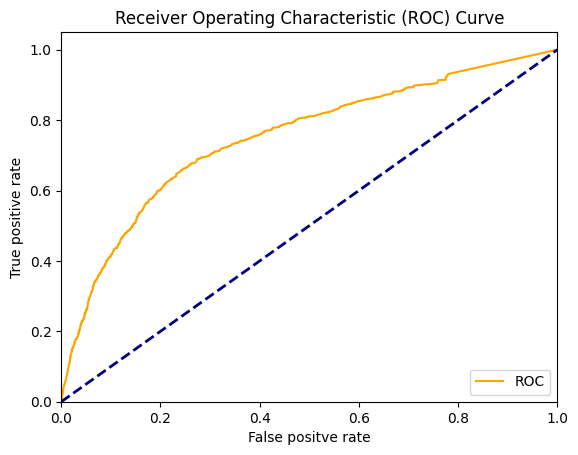

In [549]:
plot_roc_curve(fpr, tpr)

### Modelling Logistic Regression using RandomForest

# X_trains, X_tests ,y_trains, y_tests =train_test_split(X,y,test_size=0.30,random_state=42)
# model = RandomForestClassifier()
# model.fit(X_trains,y_trains)

# model.score(X_trains,y_trains)

# model.score(X_tests,y_tests)

# from sklearn.ensemble import RandomForestRegressor
# np.random.seed(42)

# create the data
# y1= bankData["y_yes"]
# x1 = bankData[['housing_yes','duration']]

# Split the data into train and test
# x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size=0.30,random_state=32)

# instantiate and fit model
# model = RandomForestRegressor(n_estimators=100).fit(x_train1,y_train1)

# model.score(x_test1,y_test1)